# K-Means Lab

In this lab, you will apply K-Means to look for clusters that exist in randomly generated data

You will be using SkLearn

_Based on Lorraine Li's example_

## Step One - Imports

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Step Two - Generate the Data

Notice that you are generating five clusters with more variance than the last one - the lab is about whether or not K-Means can figure out that the data is clustered

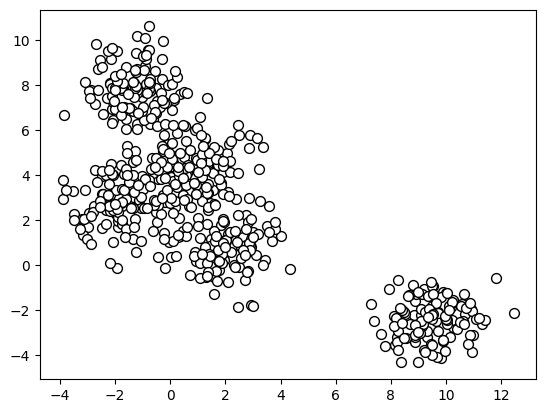

In [3]:
X, y = make_blobs(
   n_samples=600, n_features=2,
   centers=5, cluster_std=1.0,
   shuffle=True, random_state=0
)

plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

## Step Three - Look for elbows

Of course, since you generated the data, you know that there are three clusters. This portion is about showing that the elbow analysis can figure that out

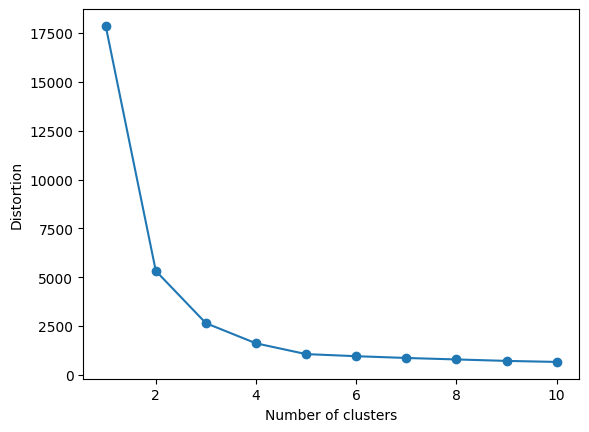

In [4]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)


plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Step Four - Run K-Means

In [5]:
km = KMeans(
    n_clusters=4, init='random',  # set this to 4 or 5 depending on how many clusters you are using
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

Plot the results

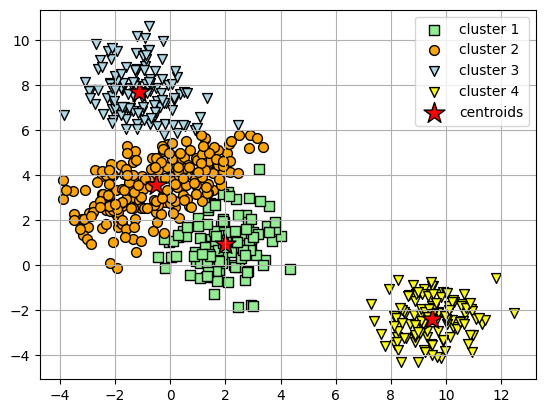

In [6]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)

## Comment this out if you are using 4 clusters
#plt.scatter(
#    X[y_km == 4, 0], X[y_km == 4, 1],
#   s=50, c='pink',
#   marker='v', edgecolor='black',
#    label='cluster 5'
#)




# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.show()